In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SBAnational.csv')

In [3]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None) 

df

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [4]:
df.shape

(899164, 27)

In [5]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [6]:
df[['Term', 'NoEmp', 'CreateJob', 'RetainedJob']].describe()

,Term,NoEmp,CreateJob,RetainedJob
count,899164.000000,899164.000000,899164.000000,899164.000000
mean,110.773078,11.411353,8.430376,10.797257
std,78.857305,74.108196,236.688165,237.120600
min,0.000000,0.000000,0.000000,0.000000
25%,60.000000,2.000000,0.000000,0.000000
50%,84.000000,4.000000,0.000000,1.000000
75%,120.000000,10.000000,1.000000,4.000000
max,569.000000,9999.000000,8800.000000,9500.000000


In [7]:
df[['MIS_Status']].value_counts()

MIS_Status
P I F         739609
CHGOFF        157558
Name: count, dtype: int64

The values above indicate PIF and CHGOFF are present at the ratio of almost **1:5**. This value becomes important during data modeling while understanding class imbalances. We have dealt with this issue during Data Modeling.

In [8]:
# Encode MIS_Status: 'CHGOFF' as 1, 'P I F' as 0
df['MIS_Status'] = df['MIS_Status'].replace({'CHGOFF': 1, 'P I F': 0})

# Convert MIS_Status to integer type with NaN values allowed
df['MIS_Status'] = df['MIS_Status'].astype('Int64')

In [9]:
df['MIS_Status'].unique()

<IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64

We observe that there are NaN values as well in MIS_Status column.

To observe the Charged Off and Paid in Full to Loans for each year, and identify macro-economic factors affecting, the counts of these values help us have a better understanding of loan disbursement criterias during different stages of the economy. 

Since the years had some discripencies, we had execute the following code to convert all the years to integers only.

In [10]:
# Remove non-numeric characters and convert the column to integer
df['ApprovalFY'] = df['ApprovalFY'].astype(str)  # Convert all entries to string to handle mixed types
df['ApprovalFY'] = df['ApprovalFY'].str.extract('(\d{4})')[0]  # Extract only the year part
df['ApprovalFY'] = pd.to_numeric(df['ApprovalFY'], errors='coerce')  # Convert to numeric, coerce errors to NaN

### Plotting a graph to show Number of Loans(Charged Off, Paid in Full) for each Fiscal Year

In [11]:
status_distribution = df.groupby(['ApprovalFY','MIS_Status']).size().unstack()

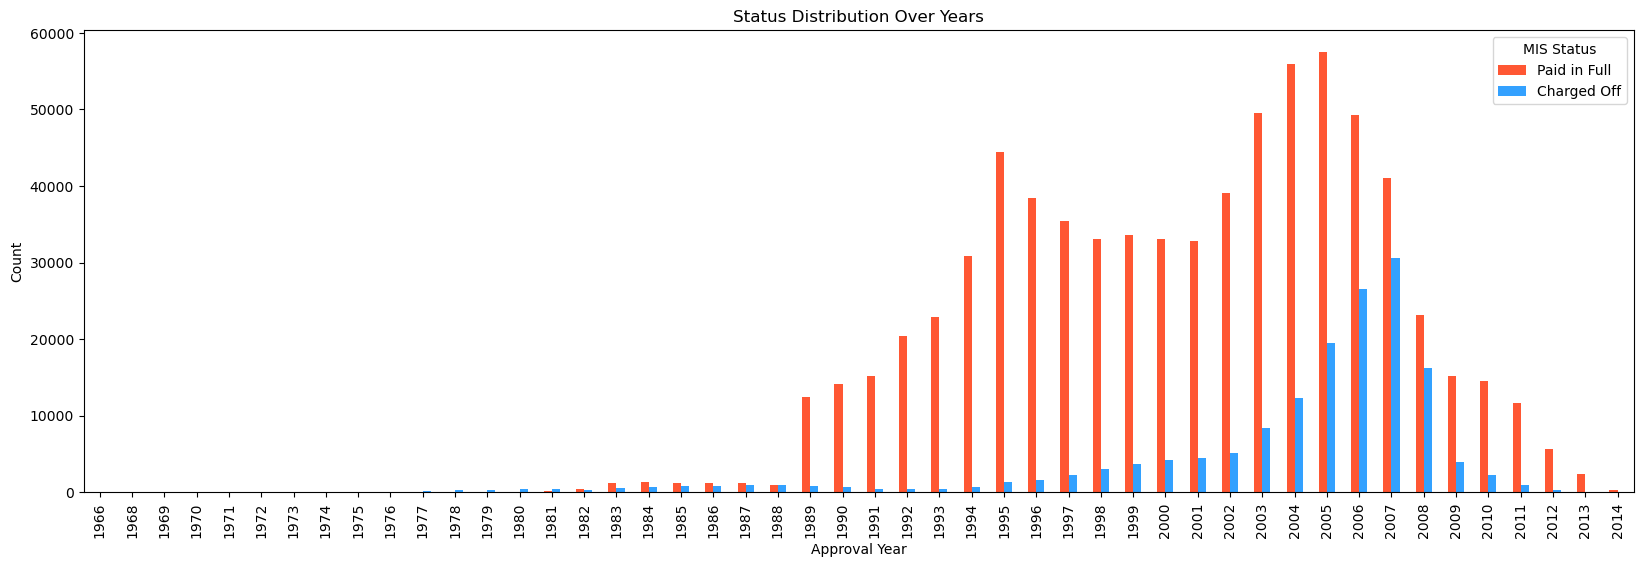

In [12]:
status_distribution.plot(kind='bar',title='Status Distribution Over Years',figsize=(20,6), color=['#FF5733', '#33A1FF'])
plt.xlabel('Approval Year')
plt.ylabel('Count')
plt.legend(title='MIS Status', labels=['Paid in Full', 'Charged Off'])
plt.show()

From the graph above, it is observed that the years 2006, 2007, and 2008 exhibited the highest percentage of charged-off loans. This trend directly correlates with the Great Recession of 2008, during which the U.S. economy experienced a 4.5% decline in GDP and the S&P 500 index fell by 57%.

### Plotting a graph to show Mean Amount of Loan Sanctioned by Years

In [13]:
df['GrAppv'] = df['GrAppv'].replace('[\$,]', '', regex=True).astype(float)

In [14]:
mean_approved_yearly = df.groupby('ApprovalFY')['GrAppv'].mean()

In [15]:
print("Mean Approved Amount by Year:\n", mean_approved_yearly)

Mean Approved Amount by Year:
 ApprovalFY
1962    100000.000000
1965    150000.000000
1966     60000.000000
1967     37500.000000
1968    129000.000000
1969    131175.000000
1970     75582.500000
1971    128750.000000
1972    134879.629630
1973    147384.615385
1974    161031.190476
1975    121063.333333
1976    162973.809524
1977    177740.145985
1978    189449.586777
1979    187048.863636
1980    199188.383648
1981    195442.190476
1982    183329.944367
1983    204978.747031
1984    210357.541048
1985    200583.530350
1986    205867.215770
1987    211385.021641
1988    225012.444679
1989    216504.622509
1990    231830.419678
1991    241669.301289
1992    257063.932535
1993    266611.195495
1994    243549.032787
1995    168152.237008
1996    197025.884897
1997    220833.465376
1998    228608.763744
1999    246050.792629
2000    247500.178139
2001    241394.892985
2002    239026.149580
2003    172376.677590
2004    166824.545512
2005    149778.454653
2006    132759.819792
2007    1220

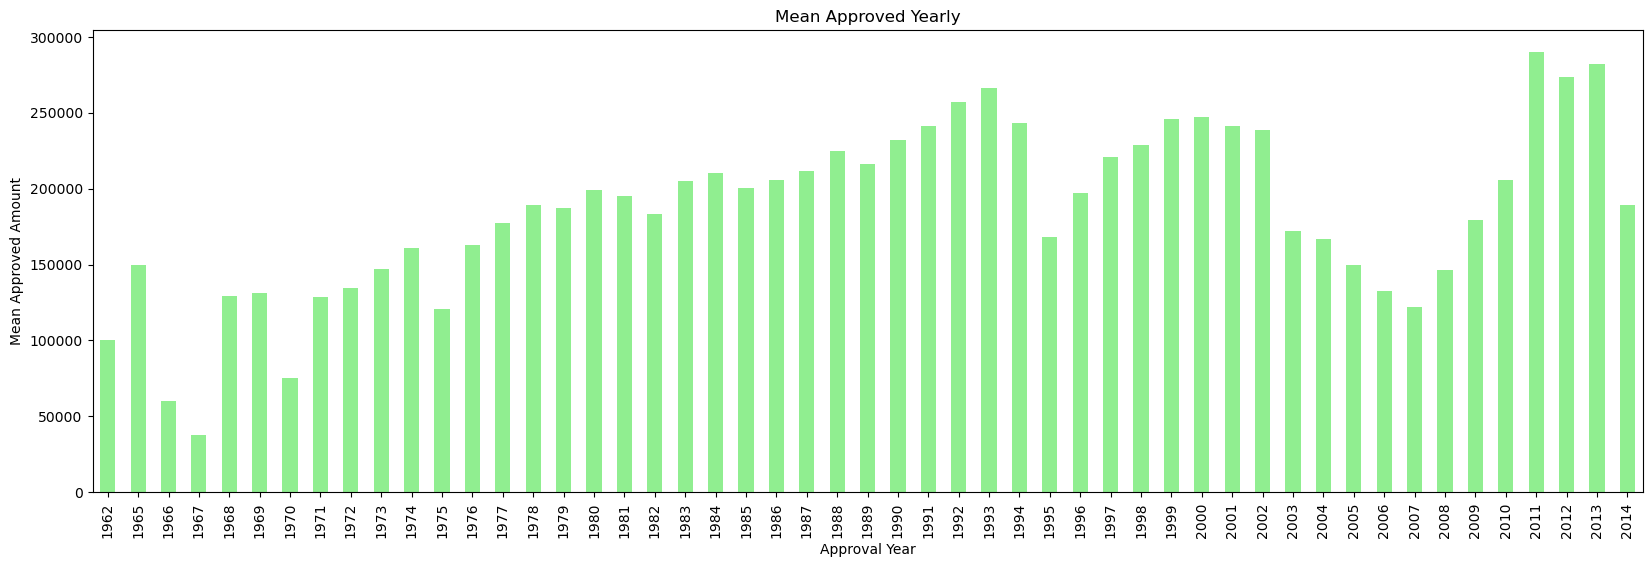

In [16]:
mean_approved_yearly.plot(kind='bar',title='Mean Approved Yearly',figsize=(20,6), color='lightgreen')
plt.xlabel('Approval Year')
plt.ylabel('Mean Approved Amount')
plt.show()

This graph illustrates the variation in approval amounts over the years. An increase in disbursement amounts directly correlates with the economic conditions of the time. Generally, a strong economic status is associated with higher disbursement levels.

### Plotting a graph to display Charged Off Amount Every Year

In [17]:
charged_off_data=df[df['MIS_Status']==1]

In [18]:
charged_off_data.shape

(157558, 27)

In [19]:
charged_off_data

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,45,45,2.0,0,0,0,0,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,1,"$208,959.00",600000.0,"$499,998.00"
36,1000554001,PAUL E. & JUDY A. FAATZ,KINSMAN,OH,44428,CORTLAND SAVINGS & BK. CO.,OH,0,28-Feb-97,1997,137,2,1.0,0,0,1,0,N,Y,18-Apr-02,30-Jun-97,"$47,000.00",$0.00,1,"$14,084.00",47000.0,"$37,600.00"
43,1000653000,LARRY SCHOETTMER FORD INC,EDINBURGH,IN,46124,JPMORGAN CHASE BANK NATL ASSOC,IN,0,11-Jun-80,1980,120,16,2.0,0,0,0,0,Y,N,4-Oct-89,31-Jul-80,"$197,485.00",$0.00,1,"$44,374.00",200000.0,"$150,000.00"
58,1000726007,NEW DIMENSION HOMES INC,CLINTON (CENSUS NAME FOR CLINT,ME,4927,WELLS FARGO BANK NATL ASSOC,SD,236115,7-Feb-06,2006,167,9,1.0,0,9,1,1,0,N,26-Jun-14,28-Feb-06,"$1,350,000.00",$0.00,1,"$1,043,508.00",1350000.0,"$1,012,500.00"
60,1000735003,Mykols Marine Inc.,Spring Lake,MI,49417,WELLS FARGO BANK NATL ASSOC,SD,713930,31-Mar-97,1997,7,10,1.0,0,0,1,0,0,N,4-Oct-05,28-Feb-98,"$25,000.00",$0.00,1,"$23,484.00",25000.0,"$12,500.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899131,9995033006,"MCARTHUR DEVELOPMENT, INC.",CHATTANOOGA,TN,37416,FIRST VOLUNTEER BANK,TN,233210,27-Feb-97,1997,6,3,1.0,0,0,1,0,0,N,9-Dec-05,31-Mar-97,"$125,000.00",$0.00,1,"$6,351.00",125000.0,"$93,750.00"
899138,9995143004,MR. GOODCENTS,OVERLAND PARK,KS,66212,METCALF BANK,KS,0,27-Feb-97,1997,42,9,1.0,0,0,54100,0,N,Y,29-May-01,31-May-97,"$100,000.00",$0.00,1,"$78,494.00",100000.0,"$80,000.00"
899143,9995213001,CITY CONSTRUCTION CORPORATION,MARLTON,NJ,8053,BANCO POPULAR NORTH AMERICA,NJ,235610,27-Feb-97,1997,62,1,2.0,0,0,1,0,0,N,19-Sep-00,31-May-97,"$150,000.00",$0.00,1,"$124,847.00",150000.0,"$112,500.00"
899153,9995413002,NORTH SHORE FLORAL,WOODBURY,NY,11797,FLUSHING BANK,NY,0,27-Feb-97,1997,119,5,1.0,0,0,1,0,0,N,7-Jul-04,31-May-97,"$142,000.00",$0.00,1,$0.00,142000.0,"$106,500.00"


In [20]:
# Clean the ChgOffPrinGr values for charged_off_data
charged_off_data['ChgOffPrinGr'] = charged_off_data['ChgOffPrinGr'].replace('[\$,]', '', regex=True).astype(float)

# Group by ApprovalFY and calculate the mean of ChgOffPrinGr
mean_charged_off = charged_off_data.groupby('ApprovalFY')['ChgOffPrinGr'].mean()

# Display the result
print("Mean Charged Off Principal by Year:\n", mean_charged_off)

Mean Charged Off Principal by Year:
 ApprovalFY
1966      6084.000000
1968     40110.000000
1969     79884.500000
1970     41113.857143
1971     59824.500000
1972     67254.571429
1973     54564.622222
1974     63115.925000
1975     54692.730769
1976     69024.512821
1977     61987.203125
1978     84909.855895
1979     91641.521084
1980    103393.506881
1981    109970.312207
1982     97152.672131
1983    108964.844569
1984    113655.022788
1985    102984.507006
1986    100607.097110
1987    100046.978238
1988    104050.263326
1989    106417.702202
1990    120805.233786
1991    130903.426637
1992    118630.222222
1993    108240.184332
1994    100920.714080
1995     77160.711420
1996     95987.160996
1997    115303.635514
1998    122325.741751
1999    142516.525176
2000    143465.899906
2001    127754.572584
2002    104935.593792
2003     62106.722849
2004     59919.616854
2005     61692.137533
2006     65571.111627
2007     64670.012851
2008     70686.158338
2009     65269.998237
2010  

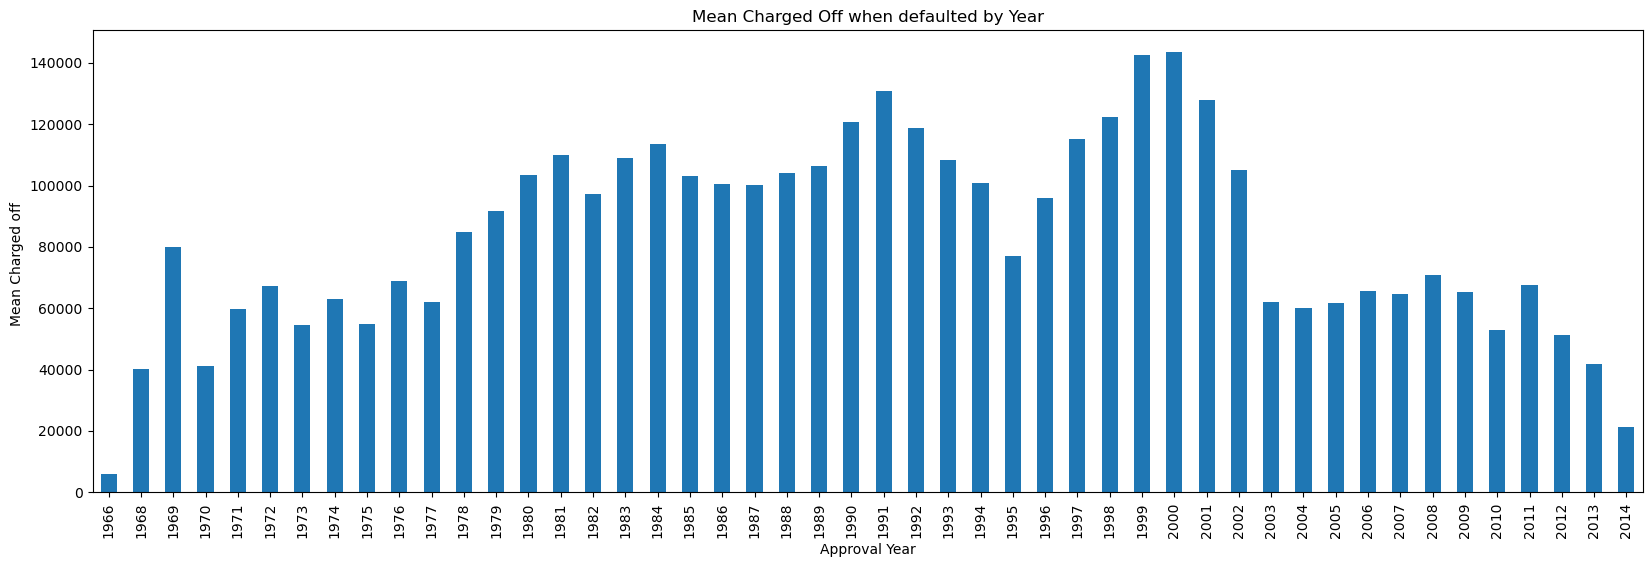

In [21]:
mean_charged_off.plot(kind='bar',title='Mean Charged Off when defaulted by Year',figsize=(20,6))
plt.xlabel('Approval Year')
plt.ylabel('Mean Charged off ')
plt.show()

The mean charged-off amounts also reflect the economic conditions of the time. Unlike the "Paid in Full" amounts, charged-off amounts are inversely proportional to economic stability. In other words, struggling economies tend to exhibit higher charged-off amounts.

In [22]:
df['ApprovalFY'] = pd.to_numeric(df['ApprovalFY'], errors='coerce')
df['NoEmp'] = pd.to_numeric(df['NoEmp'], errors='coerce')
df['RetainedJob']=pd.to_numeric(df['RetainedJob'],errors='coerce')
df['CreateJob']=pd.to_numeric(df['CreateJob'],errors='coerce')
df['DisbursementGross'] = df['DisbursementGross'].replace('[\$,]', '', regex=True).astype(float)
df['BalanceGross']=df['BalanceGross'].replace('[\$,]', '', regex=True).astype(float)
df['SBA_Appv']=df['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)
df['GrAppv'] = df['GrAppv'].replace('[\$,]', '', regex=True).astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  int64  
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [24]:
df = df[df['MIS_Status'].notna() & (df['MIS_Status'] != '')]

In [25]:
print("Number of rows after removing blanks in MIS_Status:", df.shape[0])

Number of rows after removing blanks in MIS_Status: 897167


In [26]:
# Convert columns to numeric
df['ApprovalFY'] = df['ApprovalFY'].astype('Int64')
df['NoEmp'] = df['NoEmp'].astype('Int64')
df['RetainedJob'] = df['RetainedJob'].astype('Int64')
df['CreateJob'] = df['CreateJob'].astype('Int64')
df['DisbursementGross'] = df['DisbursementGross'].replace('[\$,]', '', regex=True).astype(float)
df['BalanceGross'] = df['BalanceGross'].replace('[\$,]', '', regex=True).astype(float)
df['SBA_Appv'] = df['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)

## Plotting the Correlation Matrix for Numerical Columns

In [27]:
numeric_cols = ['ApprovalFY', 'NoEmp', 'RetainedJob', 'CreateJob', 'DisbursementGross', 'BalanceGross', 'SBA_Appv']
correlation_matrix = df[numeric_cols + ['MIS_Status']].corr()
correlation_matrix

,ApprovalFY,NoEmp,RetainedJob,CreateJob,DisbursementGross,BalanceGross,SBA_Appv,MIS_Status
ApprovalFY,1.000000,-0.054701,-0.060517,-0.067115,-0.052888,0.001540,-0.105268,0.204700
NoEmp,-0.054701,1.000000,0.015389,0.008645,0.089163,-0.000123,0.093093,-0.026265
RetainedJob,-0.060517,0.015389,1.000000,0.993955,0.010251,-0.000080,0.014878,0.012352
CreateJob,-0.067115,0.008645,0.993955,1.000000,0.006918,-0.000057,0.013722,0.011901
DisbursementGross,-0.052888,0.089163,0.010251,0.006918,1.000000,0.005595,0.940199,-0.110799
BalanceGross,0.001540,-0.000123,-0.000080,-0.000057,0.005595,1.000000,0.005266,-0.000958
SBA_Appv,-0.105268,0.093093,0.014878,0.013722,0.940199,0.005266,1.000000,-0.132232
MIS_Status,0.204700,-0.026265,0.012352,0.011901,-0.110799,-0.000958,-0.132232,1.000000


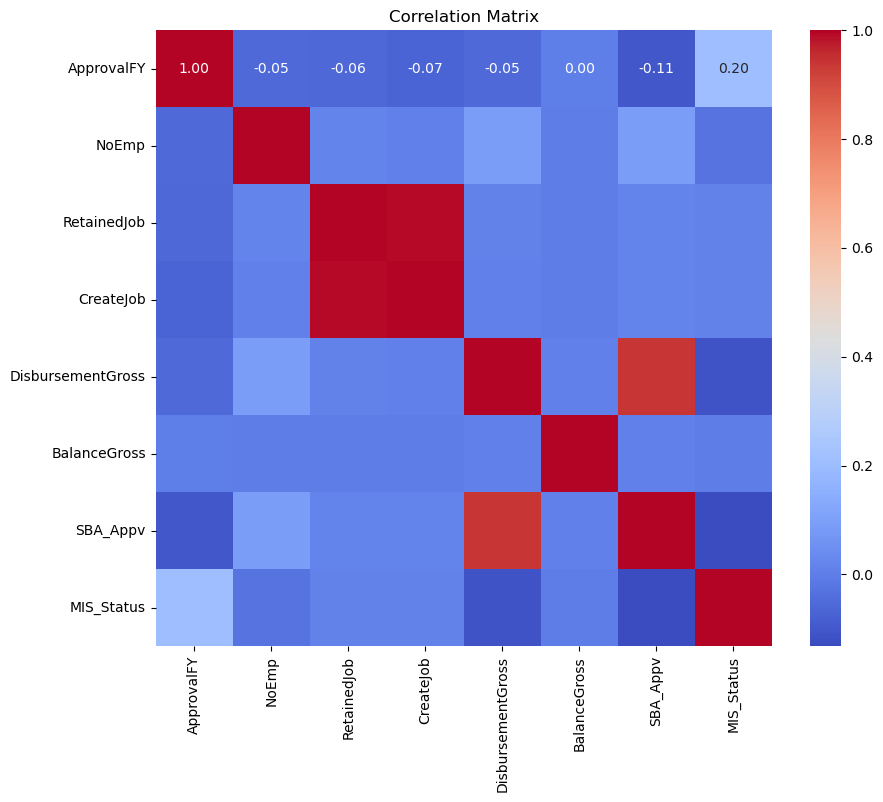

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

1. Strong correlations (e.g., RetainedJob and CreateJob, DisbursementGross and SBA_Appv) highlight significant relationships and warrant further analysis.
2. Weak or near-zero correlations (e.g., BalanceGross with others) suggest little to no direct relationship and may not provide actionable insights.
3. Negative correlations (e.g., ApprovalFY with MIS_Status) could indicate areas where inverse trends exist and merit further investigation to understand causality.

## Plotting the number of Charged-Off Loans for each Area Type

In [29]:
# 0 -> Undefined, 1 -> Urban, 2 -> Rural

charged_off_counts = df['UrbanRural'].value_counts()

print("Charged-off loans in Urban, Rural, and Undefined areas:\n", charged_off_counts)

Charged-off loans in Urban, Rural, and Undefined areas:
 UrbanRural
1    469281
0    322826
2    105060
Name: count, dtype: int64


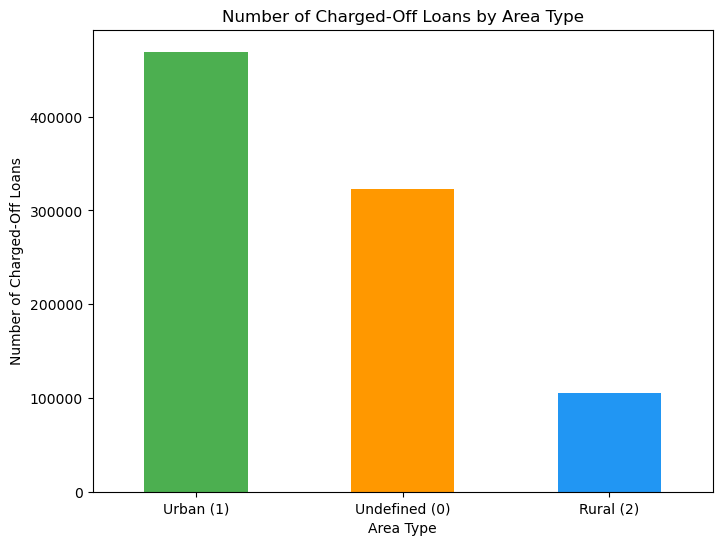

In [30]:
# Plot the counts
# Rename index for clarity
charged_off_counts.index = ['Urban (1)', 'Undefined (0)', 'Rural (2)']
plt.figure(figsize=(8, 6))
charged_off_counts.plot(kind='bar', color=['#4CAF50', '#FF9800', '#2196F3'])
plt.title('Number of Charged-Off Loans by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Number of Charged-Off Loans')
plt.xticks(rotation=0)
plt.show()

## Plotting Number of Loans for each Area Type

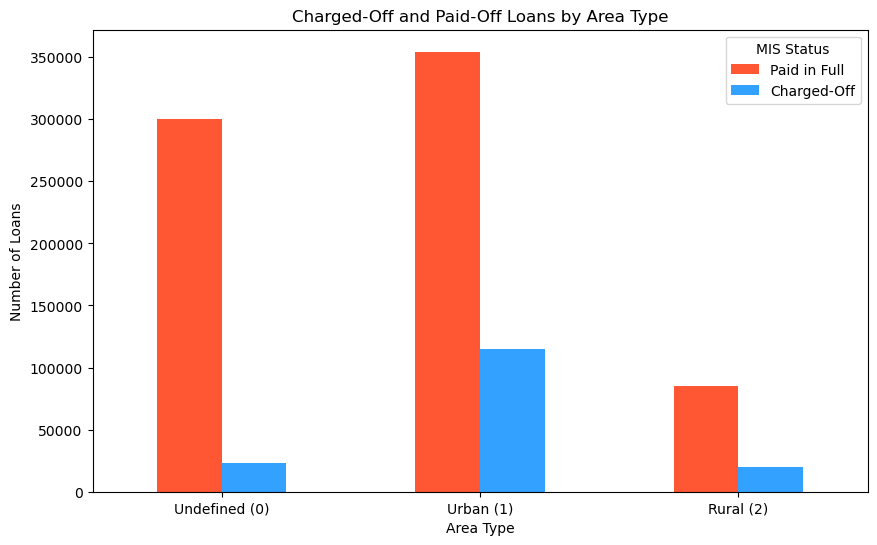

In [31]:
import matplotlib.pyplot as plt

# Filter and count charged-off and paid-off loans by area type
status_counts = df[df['MIS_Status'].isin([0, 1])].groupby(['UrbanRural', 'MIS_Status']).size().unstack(fill_value=0)

# Rename index for clarity
status_counts.index = ['Undefined (0)', 'Urban (1)', 'Rural (2)']

# Plot the results
status_counts.plot(kind='bar', stacked=False, color=['#FF5733', '#33A1FF'], figsize=(10, 6))
plt.title('Charged-Off and Paid-Off Loans by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.legend(title='MIS Status', labels=['Paid in Full', 'Charged-Off'])
plt.show()

## Plotting Number of Loans with respect to Having a Revolving Line of Credit

In [32]:
df['RevLineCr_Cat'] = df['RevLineCr'].apply(lambda x: 'Yes' if x == 'Y' else 'No')
revenue_line_count = df[df['MIS_Status'].isin([1, 0])] \
    .groupby(['RevLineCr_Cat', 'MIS_Status']).size().unstack(fill_value=0)
revenue_line_count.index=['Yes','No']

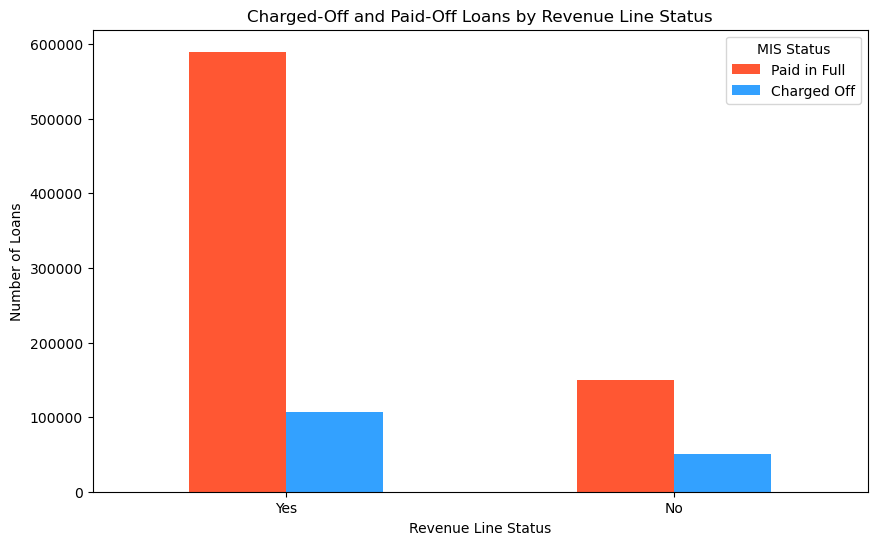

In [33]:
revenue_line_count.plot(kind='bar', stacked=False, color=['#FF5733', '#33A1FF'], figsize=(10, 6))
plt.title('Charged-Off and Paid-Off Loans by Revenue Line Status')
plt.xlabel('Revenue Line Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.legend(title='MIS Status', labels=['Paid in Full', 'Charged Off'])
plt.show()

## Plotting Number of Loans for each Business Type

In [34]:
df['NewExist'].value_counts()

NewExist
1.0    643446
2.0    252559
0.0      1028
Name: count, dtype: int64

In [35]:
revenue_line_count = df[df['MIS_Status'].isin([1, 0])].groupby(['RevLineCr_Cat', 'MIS_Status']).size().unstack(fill_value=0)
revenue_line_count.index=['Existing Business','New Business']

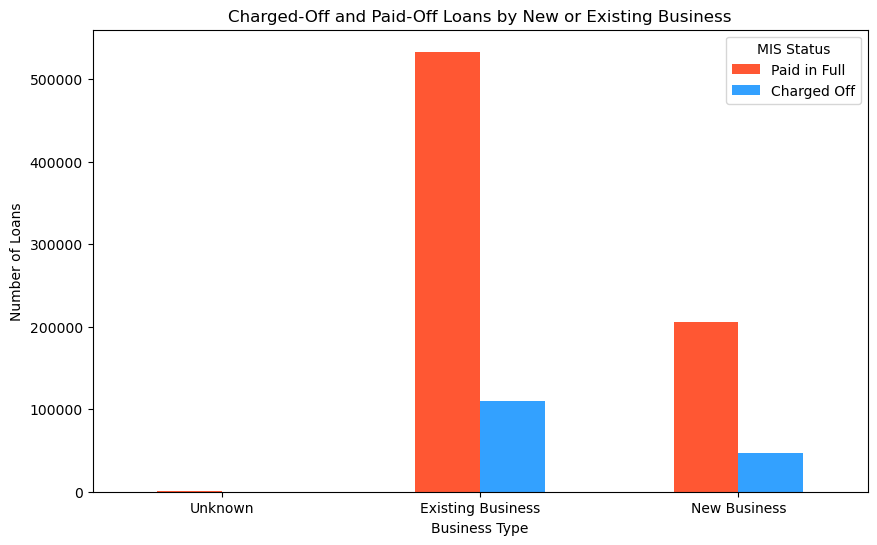

In [36]:
Business_counts = df[df['MIS_Status'].isin([1, 0])].groupby(['NewExist', 'MIS_Status']).size().unstack(fill_value=0)
Business_counts.index = ['Unknown','Existing Business','New Business']

# Plot the results
Business_counts.plot(kind='bar', stacked=False, color=['#FF5733', '#33A1FF'], figsize=(10, 6))
plt.title('Charged-Off and Paid-Off Loans by New or Existing Business')
plt.xlabel('Business Type')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.legend(title='MIS Status', labels=['Paid in Full', 'Charged Off'])
plt.show()

## Plotting the Mean Disbursement Amount against Term(in years)

In [37]:
df['Term']

0          84
1          60
2         180
3          60
4         240
         ... 
899159     60
899160     60
899161    108
899162     60
899163     48
Name: Term, Length: 897167, dtype: int64

In [38]:
df['term_years'] = (df['Term']/12).astype('int')

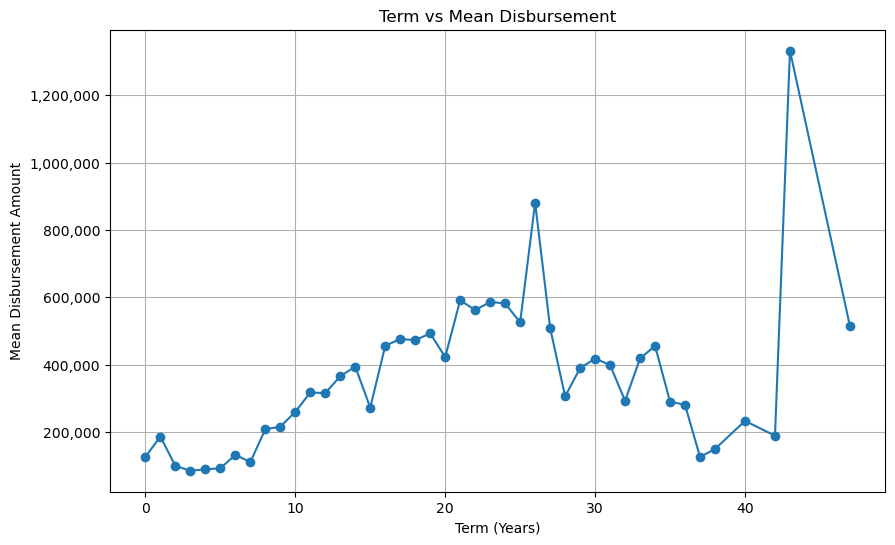

In [39]:
import matplotlib.ticker as mticker

# Assuming df is your dataframe and it contains the columns 'DisbursementGross' and 'Term'

# Convert 'DisbursementGross' to numeric if it's not already
df['DisbursementGross'] = pd.to_numeric(df['DisbursementGross'], errors='coerce')

# Group by 'Term' and calculate the mean of 'DisbursementGross'
mean_disbursement_by_term = df.groupby('term_years')['DisbursementGross'].mean()

# Reset the index for plotting
mean_disbursement_by_term = mean_disbursement_by_term.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.plot(mean_disbursement_by_term['term_years'], mean_disbursement_by_term['DisbursementGross'], marker='o')
plt.title('Term vs Mean Disbursement')
plt.xlabel('Term (Years)')
plt.ylabel('Mean Disbursement Amount')
plt.grid(True)
plt.show()

## Plotting the Mean Disbursement Amount for each State

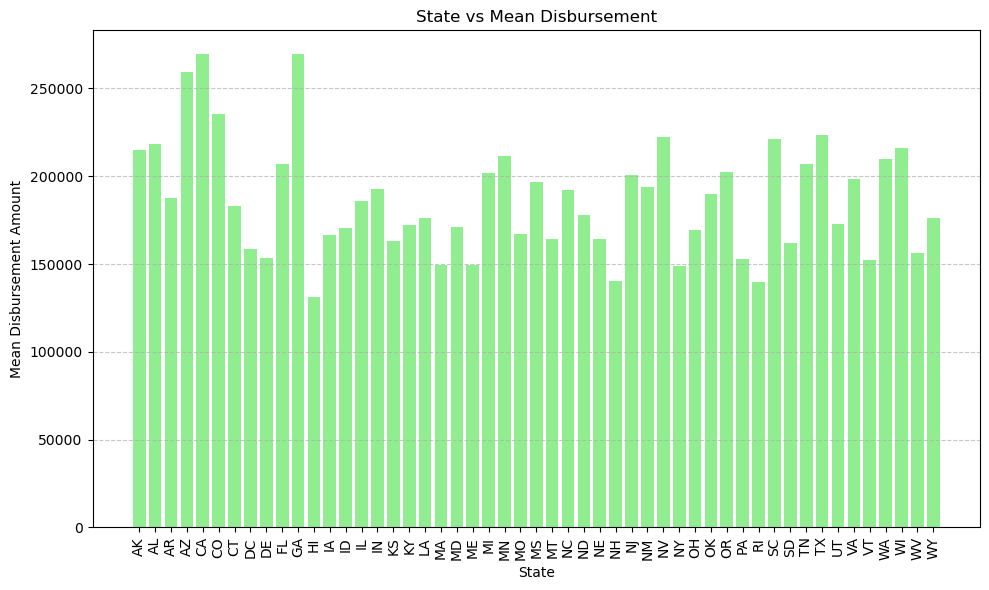

In [40]:
# Group by 'State' and calculate the mean of 'DisbursementGross'
mean_disbursement_by_state = df.groupby('State')['DisbursementGross'].mean()

# Reset the index for plotting
mean_disbursement_by_state = mean_disbursement_by_state.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(mean_disbursement_by_state['State'], mean_disbursement_by_state['DisbursementGross'], color='lightgreen')
plt.title('State vs Mean Disbursement')
plt.xlabel('State')
plt.ylabel('Mean Disbursement Amount')
plt.xticks(rotation=90)  # Rotate state names for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines for clarity
plt.tight_layout()  # Adjust layout for better fit
plt.show()